In [ ]:
from methods_toroidal_filament.DxDz import cal_newton_DxDz
from methods_toroidal_filament.parameters import coil_angle_dict, R0, R, mu,all_arrays,I
from methods_toroidal_filament.signal_strength import cal_signal, coil_signal

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
import scipy as sc

import os


presentation_path = r"C:\Users\pitit\Documents\01_MUIC_work\ICPY 441 Senior project\meetings\specialFilamentMeeting"

plt.rcParams.update({
    "font.size":15
})
plt.style.use("seaborn-v0_8-dark-palette")

# Calculate difference between theoretical and experimental signal

In [71]:
cal_ampere_signal = lambda Dx, Dz, theta: mu*I/2/np.pi * (R- (Dx*np.cos(theta) + Dz*np.sin(theta))) / ( (R*np.sin(theta)-Dz)**2 + (R*np.cos(theta) - Dx)**2 )

difference_dict = {probe: [] for probe in np.unique(all_arrays)}
bio_savart_signal_lst = [[] for _ in range(13)]
ampere_signal_lst = [[] for _ in range(13)]

iteration = 0

x_shift, z_shift = np.linspace(-0.10,0.10,1000), np.linspace(-0.10,0.10,1000)
# x_shift, z_shift = [0],[0]

for x, z in zip(x_shift, z_shift):
    for probe_array in [[1,4,7,10]]:
        probe_angles = [coil_angle_dict[probe] for probe in probe_array]
        #calculate signal from bio-savart (current loop)
        bio_savart_signal = cal_signal(x,z,probe_angles)

        #calculate Dx Dz
        Dx, Dz = cal_newton_DxDz(bio_savart_signal,probe_angles)

        #calculate magnetic signal from current line
        ampere_signal = [cal_ampere_signal(Dx,Dz,theta) for theta in probe_angles]

        for probe, bio_savart, ampere in zip(probe_array, bio_savart_signal,ampere_signal):
            difference_dict[probe].append(abs((bio_savart-ampere)/bio_savart) * 100)
            bio_savart_signal_lst[probe].append(bio_savart)
            ampere_signal_lst[probe].append(ampere)       
            
 
    iteration += 1


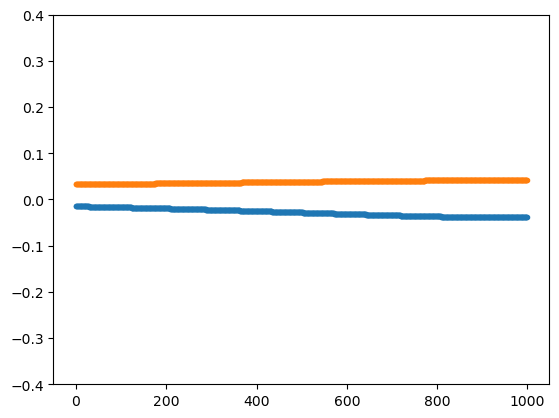

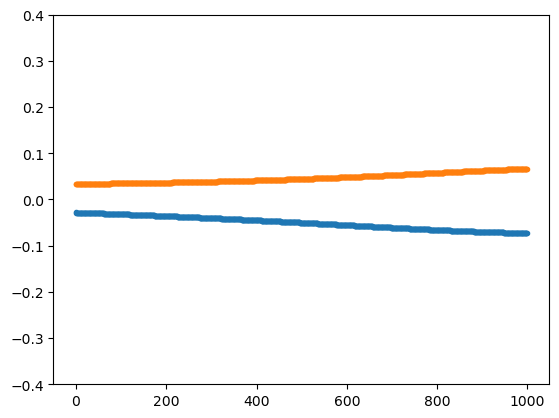

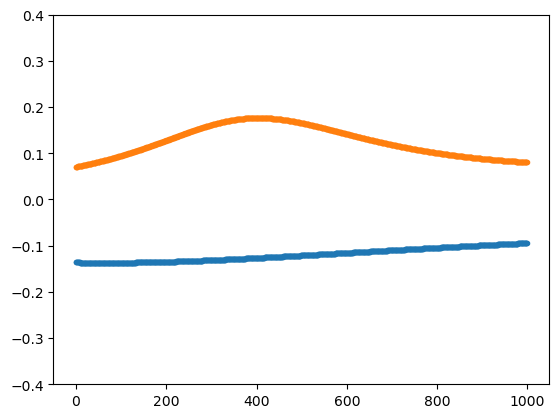

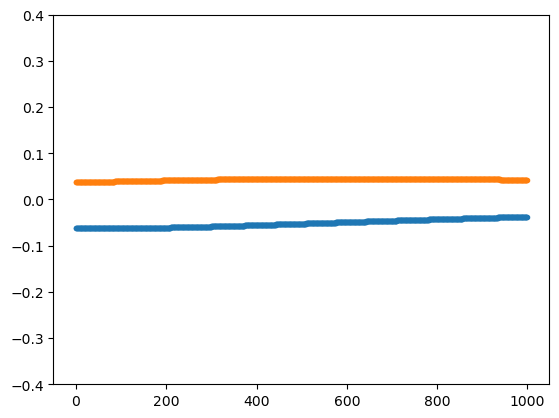

In [72]:
iteration_range = np.arange(0,iteration,1)
for i in [1,4,7,10]:
    plt.plot(iteration_range,bio_savart_signal_lst[i],".-")
    plt.plot(iteration_range,ampere_signal_lst[i],".-")
    plt.ylim(-0.4,0.4)
    plt.show()

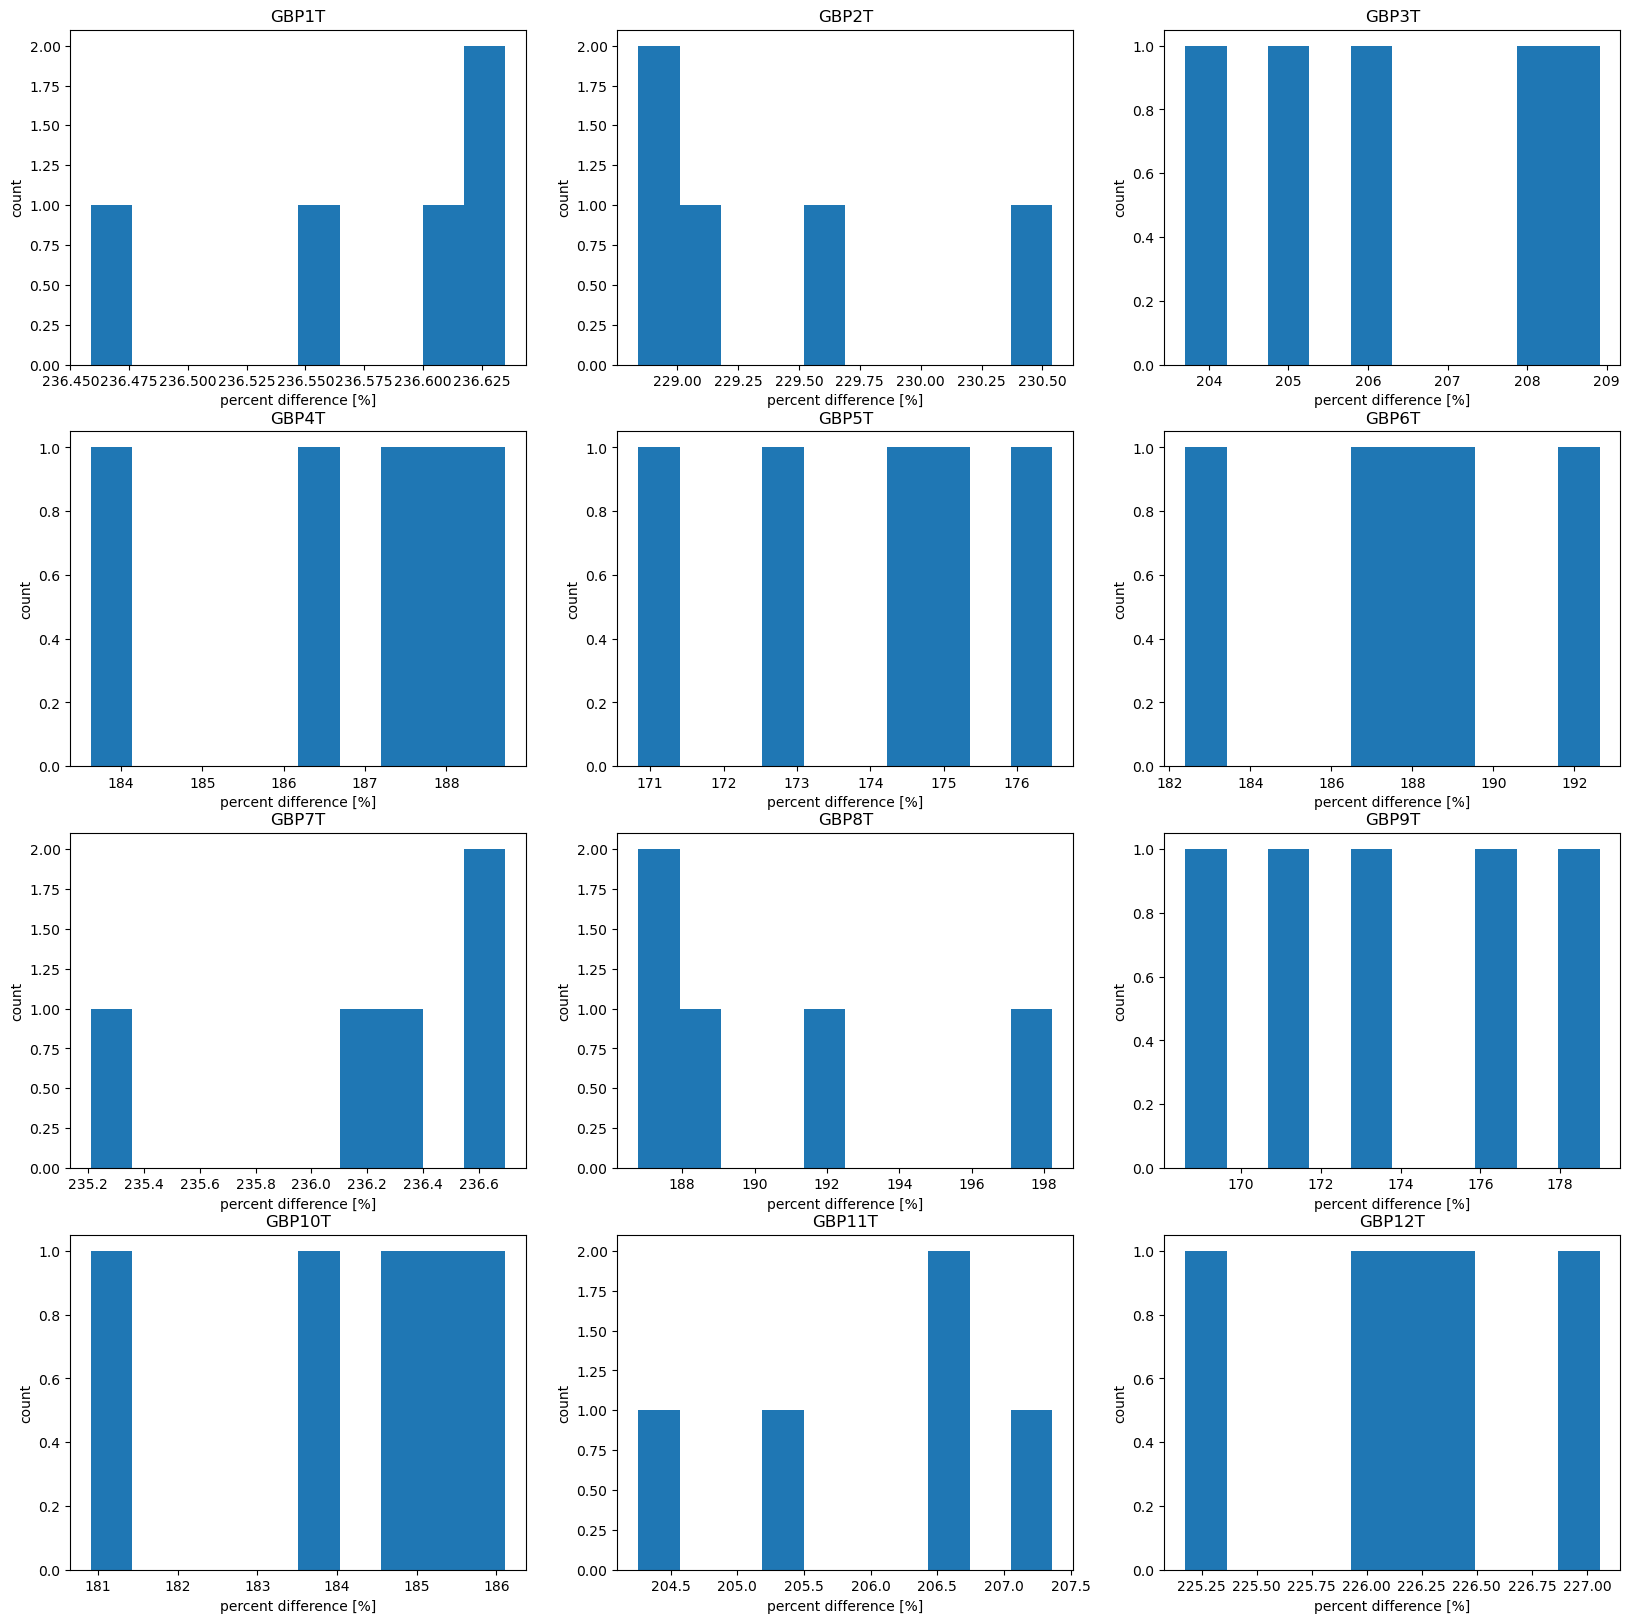

In [23]:
fig, ax = plt.subplots(4,3,figsize = (20,20))

num_row, num_column = ax.shape

probe_count = 1
for i in range(num_row):
    for j in range(num_column):
        ax[i,j].hist(difference_dict[probe_count])
        ax[i,j].set_title(f"GBP{probe_count}T")
        ax[i,j].set_xlabel("percent difference [%]")
        ax[i,j].set_ylabel("count")
        probe_count += 1

# Realtionship of $\Delta_{||} \sim \Delta_x$ and $\Delta_\perp \sim \Delta_z$

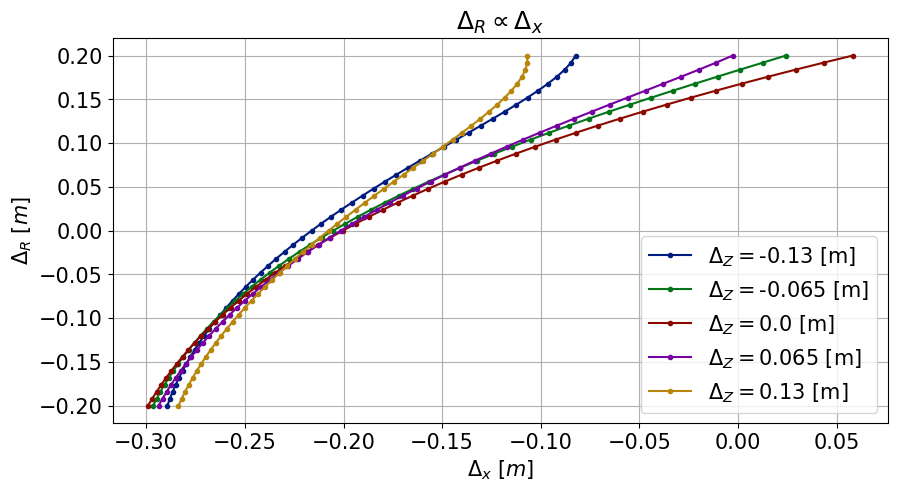

In [ ]:
#define plot
fig, ax = plt.subplots(1,figsize = (10,5))

#define shift values
x_lower_lim, x_upper_lim = -0.20,0.20
z_lower_lim, z_upper_lim = -0.13,0.13
x_shift = np.linspace(x_lower_lim,x_upper_lim,51)
z_shift = np.linspace(z_lower_lim,z_upper_lim,5)

#define probes to be used
use_probe = [coil_angle_dict[1],coil_angle_dict[4],coil_angle_dict[7],coil_angle_dict[10]]

#calculate Dx & Dz
for z in z_shift:
    Dx_arr = []
    for x in x_shift:
        signal = cal_signal(x,z,use_probe)
        Dx, _ = cal_newton_DxDz(signal,use_probe)

        Dx_arr.append(Dx)

    ax.plot(Dx_arr, x_shift,".-",label = r"$\Delta_Z = $" + f"{z} [m]")

ax.set_title(r"$\Delta_R \propto \Delta_x$")
ax.set_xlabel(r"$\Delta_x \ [m]$")
ax.set_ylabel(r"$\Delta_R \ [m]$")
ax.grid()
ax.legend()

plt.savefig(os.path.join(r"C:\Users\pitit\Documents\01_MUIC_work\ICPY 441 Senior project\seniorProject\myProject\thesisBook\images", "xRelation"))

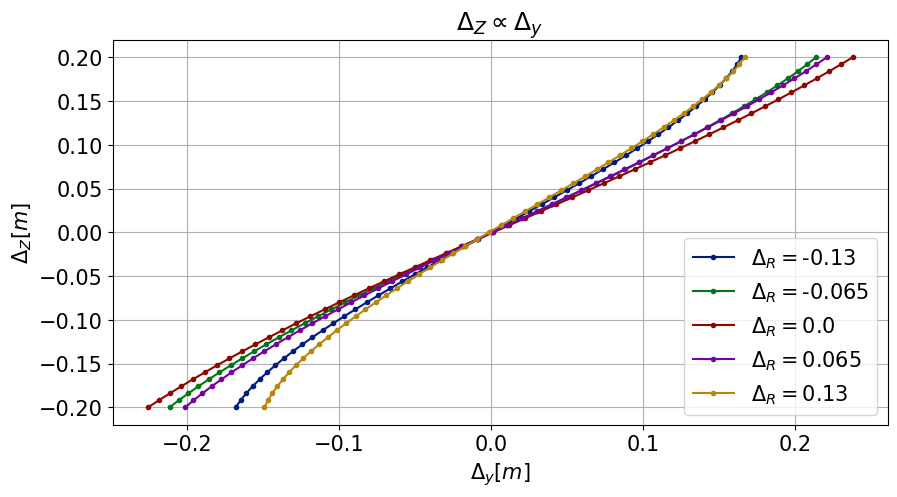

In [4]:
#define plot
fig, ax = plt.subplots(1,figsize = (10,5))

#define shift values
x_lower_lim, x_upper_lim = -0.13,0.13
z_lower_lim, z_upper_lim = -0.2,0.2
x_shift = np.linspace(x_lower_lim,x_upper_lim,5)
z_shift = np.linspace(z_lower_lim,z_upper_lim,51)

#define probes to be used
use_probe = [coil_angle_dict[1],coil_angle_dict[4],coil_angle_dict[7],coil_angle_dict[10]]

#calculate Dx & Dz
for x in x_shift:
    Dz_arr = []
    for z in z_shift:
        signal = cal_signal(x,z,use_probe)
        _, Dz = cal_newton_DxDz(signal,use_probe)

        Dz_arr.append(Dz)

    ax.plot(Dz_arr, z_shift,".-",label = r"$\Delta_R = $" + f"{x}")

ax.set_title(r"$\Delta_Z \propto \Delta_y$")
ax.set_xlabel(r"$\Delta_y [m]$")
ax.set_ylabel(r"$\Delta_Z [m]$")
ax.grid()
ax.legend(loc = "lower right")

plt.savefig(presentation_path + "zRelation")


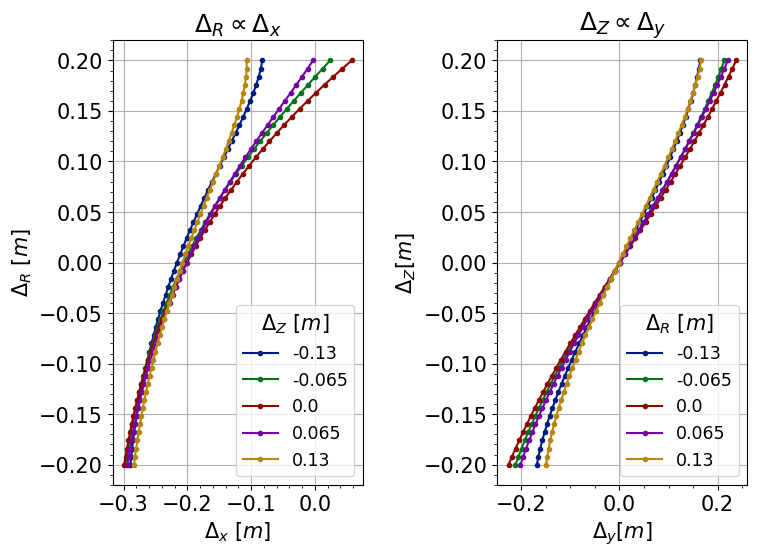

In [6]:
#combine two relation plots

fig, ax = plt.subplots(1,2,figsize = (8,6))

#Dr ~ Dx relation

#define shift values
x_lower_lim, x_upper_lim = -0.20,0.20
z_lower_lim, z_upper_lim = -0.13,0.13
x_shift = np.linspace(x_lower_lim,x_upper_lim,51)
z_shift = np.linspace(z_lower_lim,z_upper_lim,5)

#define probes to be used
use_probe = [coil_angle_dict[1],coil_angle_dict[4],coil_angle_dict[7],coil_angle_dict[10]]

#calculate Dx & Dz
for z in z_shift:
    Dx_arr = []
    for x in x_shift:
        signal = cal_signal(x,z,use_probe)
        Dx, _ = cal_newton_DxDz(signal,use_probe)

        Dx_arr.append(Dx)

    ax[0].plot(Dx_arr, x_shift,".-",label = f"{z}")

ax[0].set_title(r"$\Delta_R \propto \Delta_x$")
ax[0].set_xlabel(r"$\Delta_x \ [m]$")
ax[0].set_ylabel(r"$\Delta_R \ [m]$")
ax[0].grid()
ax[0].legend(loc = "lower right", fontsize = "small",title = r"$\Delta_Z \ [m]$")
ax[0].minorticks_on()


#Dz ~ Dy relation

#define shift values
x_lower_lim, x_upper_lim = -0.13,0.13
z_lower_lim, z_upper_lim = -0.2,0.2
x_shift = np.linspace(x_lower_lim,x_upper_lim,5)
z_shift = np.linspace(z_lower_lim,z_upper_lim,51)

#define probes to be used
use_probe = [coil_angle_dict[1],coil_angle_dict[4],coil_angle_dict[7],coil_angle_dict[10]]

#calculate Dx & Dz
for x in x_shift:
    Dz_arr = []
    for z in z_shift:
        signal = cal_signal(x,z,use_probe)
        _, Dz = cal_newton_DxDz(signal,use_probe)

        Dz_arr.append(Dz)

    ax[1].plot(Dz_arr, z_shift,".-",label = f"{x}")

ax[1].set_title(r"$\Delta_Z \propto \Delta_y$")
ax[1].set_xlabel(r"$\Delta_y [m]$")
ax[1].set_ylabel(r"$\Delta_Z [m]$")
ax[1].grid()
ax[1].legend(loc='lower right', fontsize='small',title = r"$\Delta_R \ [m]$")
ax[1].minorticks_on()

fig.tight_layout(pad=1.5)  # pad increases spacing between subplots

## Reasons to bound shift value

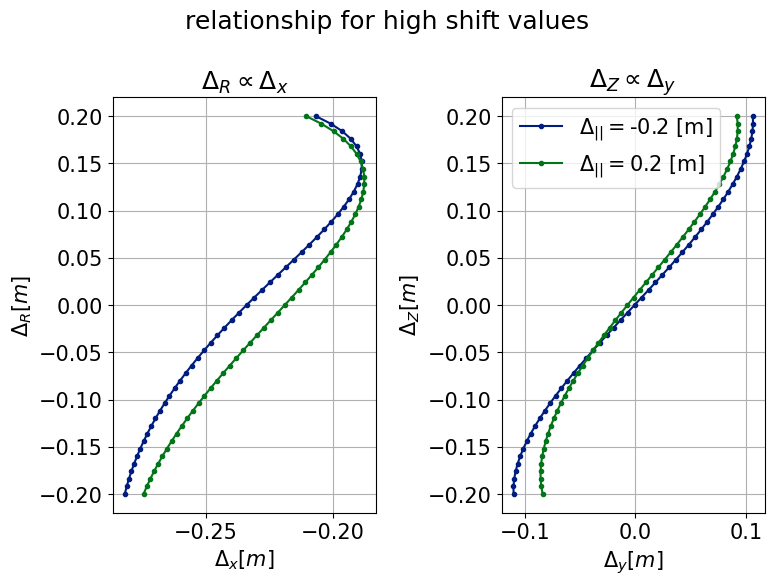

In [ ]:
#define plot
fig, ax = plt.subplots(1,2,figsize = (8,6))
fig.suptitle("relationship for high shift values")

#define shift values
x_lower_lim, x_upper_lim = -0.2,0.2
z_lower_lim, z_upper_lim = -0.2,0.2
x_shift = np.linspace(x_lower_lim,x_upper_lim,51)
z_shift = np.linspace(z_lower_lim,z_upper_lim,2)

#define probes to be used
use_probe = [coil_angle_dict[1],coil_angle_dict[4],coil_angle_dict[7],coil_angle_dict[10]]

#calculate Dx & Dz
for z in z_shift:
    Dx_arr = []
    for x in x_shift:
        signal = cal_signal(x,z,use_probe)
        Dx, _ = cal_newton_DxDz(signal,use_probe)

        Dx_arr.append(Dx)

    ax[0].plot(Dx_arr, x_shift,".-",label = r"$\Delta_\perp = $" + f"{z} [m]")

ax[0].set_title(r"$\Delta_R \propto \Delta_x$")
ax[0].set_xlabel(r"$\Delta_x [m]$")
ax[0].set_ylabel(r"$\Delta_R [m]$")
ax[0].grid()
# ax[0].legend()


#define shift values
x_lower_lim, x_upper_lim = -0.2,0.2
z_lower_lim, z_upper_lim = -0.2,0.2
x_shift = np.linspace(x_lower_lim,x_upper_lim,2)
z_shift = np.linspace(z_lower_lim,z_upper_lim,51)

#define probes to be used
use_probe = [coil_angle_dict[1],coil_angle_dict[4],coil_angle_dict[7],coil_angle_dict[10]]

#calculate Dx & Dz
for x in x_shift:
    Dz_arr = []
    for z in z_shift:
        signal = cal_signal(x,z,use_probe)
        _, Dz = cal_newton_DxDz(signal,use_probe)

        Dz_arr.append(Dz)

    ax[1].plot(Dz_arr, z_shift,".-",label = r"$\Delta_{||} = $" + f"{x} [m]")

ax[1].set_title(r"$\Delta_Z \propto \Delta_y$")
ax[1].set_xlabel(r"$\Delta_y [m]$")
ax[1].set_ylabel(r"$\Delta_Z [m]$")
ax[1].grid()
ax[1].legend()

plt.tight_layout()

plt.savefig(os.path.join(r"C:\Users\pitit\Documents\01_MUIC_work\ICPY 441 Senior project\seniorProject\myProject\thesisBook\images", "highRelation.png"))

# Signal difference between experiment and simulation

In [10]:
#retreive processed data
shot_no = 966
recorded_plasma_current, recorded_time, discharge_begin, discharge_end = retreive_plasma_current(shot_no)
recorded_magnetic_signal = retreive_magnetic_signal(shot_no)

time, plasma_current, plasma_signal = trim_quantities(recorded_time,recorded_magnetic_signal,recorded_plasma_current,discharge_begin,discharge_end)

In [22]:
num_indices = 50

time_ax = plasma_signal[:num_indices].iloc[:,0]

#simulate signal with no shift
simulate_signal = pd.DataFrame(columns = plasma_signal.columns)
for t, Ip in zip(time_ax, plasma_current.to_numpy()):
    signal_lst = []
    for probe_num in range(1,13):
        phi = coil_angle_dict[probe_num]
        r = R0 + R * np.cos(phi)
        z = R * np.sin(phi) - 0
        signal_lst.append(coil_signal(phi,r,z,R0,Ip))

    new_row = [t] + signal_lst
    simulate_signal.loc[len(simulate_signal)] = new_row

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_81632\1371046955.py:16: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  fig.legend(l1,l2,labels = ["measured", "siumulated"],loc = "upper center",bbox_to_anchor = (0.5,0.95))


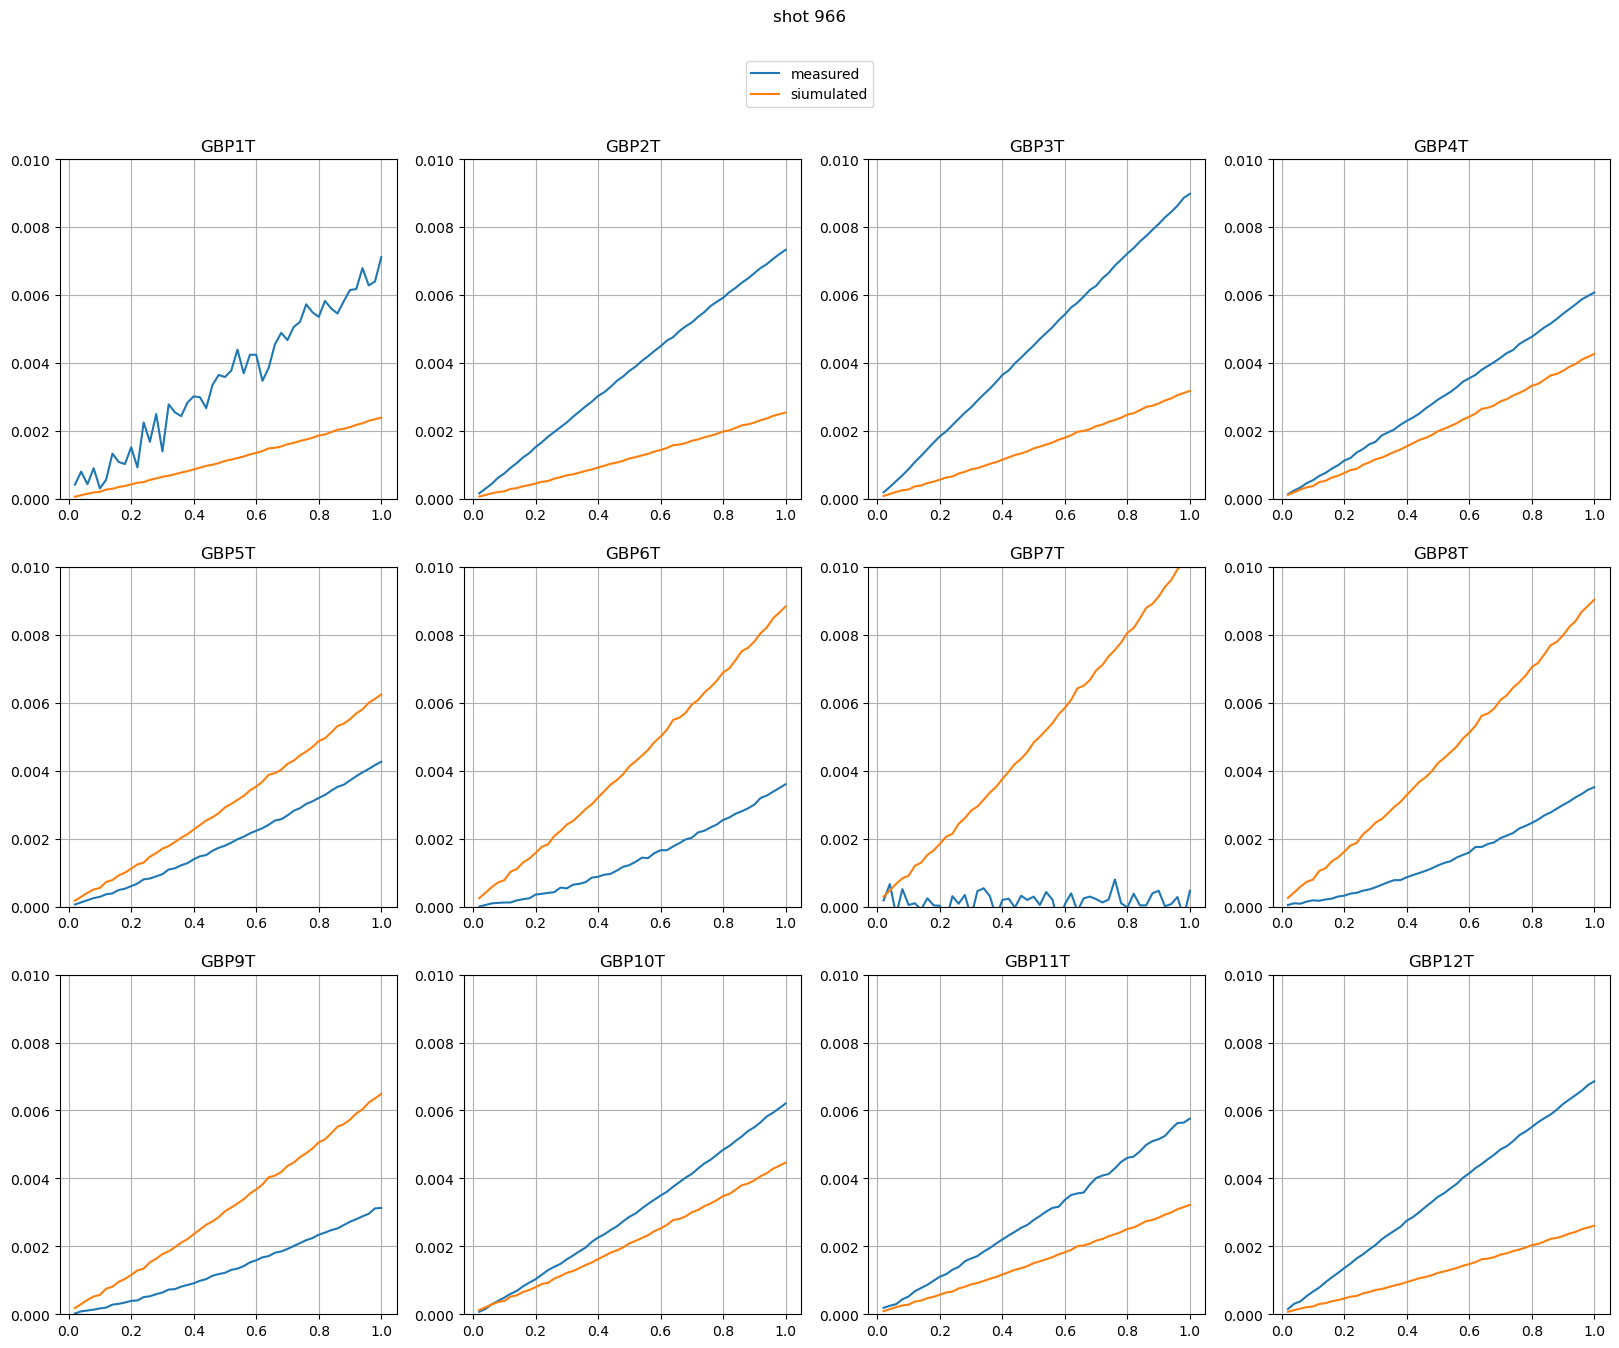

In [39]:
fig, axs = plt.subplots(3,4, figsize = (20,15))
fig.suptitle(f"shot {shot_no}")

probe_num = 1
for row in range(axs.shape[0]):

    for column in range(axs.shape[1]):
        l1 = axs[row,column].plot(time_ax,plasma_signal[:num_indices].iloc[:,probe_num])
        l2 = axs[row,column].plot(time_ax,simulate_signal[:num_indices].iloc[:,probe_num])
        axs[row, column].set_title(f"GBP{probe_num}T")
        axs[row,column].grid()
        axs[row,column].set_ylim(0,0.01)

        probe_num += 1

fig.legend(l1,l2,labels = ["measured", "siumulated"],loc = "upper center",bbox_to_anchor = (0.5,0.95))

## Simulated signal

### Signal with orientation

In [2]:
def raw_coil_signal(phi:np.float64, r:float, z:float, a_f:float,I = 1E3):
    """
    simulate magnetic magnitude at each coils in cylindrical coordinate

    Parameters:
    phi (float): angle between the positive x-axis and radial vector of the coil location in radian
    r (float) : radial distance from center of reactor to coil in meters
    z (float) : vertical distance from center of reactor to coil in meters
    a_f (float) : plasma radius in meters

    Returns:
    float: simulated magnetic signal at each coils
    """
    if None in (phi,r,z,a_f) or np.inf in (phi,r,z,a_f):
        raise ValueError(f"Nan or inf is contained in [phi,r,z,a_f] = {[phi,r,z,a_f]}")
    if a_f < 0:
        raise ValueError("a_f is negative")

    k = np.sqrt(4 * a_f * r / ((a_f + r) ** 2 + z ** 2))
    K, E = sc.special.ellipk(k ** 2), sc.special.ellipe(k ** 2)
    def b_r(r, z, a_f):  # calculate magnetic signal along radial direction with elliptic integrals
        return mu * I / 2 / np.pi * z / r / np.sqrt((a_f + r) ** 2 + z ** 2) * (
                -K + E * (a_f ** 2 + r ** 2 + z ** 2) / ((a_f - r) ** 2 + z ** 2)
                )

    def b_z(r, z, a_f):  # calculate magnetic signal along z direction with elliptic integrals
        return mu * I / 2 / np.pi * 1 / np.sqrt((a_f + r) ** 2 + z ** 2) * (
                K + E * (a_f ** 2 - r ** 2 - z ** 2) / ((a_f - r) ** 2 + z ** 2)
                )

    return b_r(r,z,a_f), b_z(r,z,a_f), np.sqrt(b_r(r, z, a_f)**2 + b_z(r, z, a_f)**2)

#calculate signal with probe orientation
def signal_simulation(x_shift, z_shift):
    signal_lst = []
    for probe_num in range(1,13):
        phi = coil_angle_dict[probe_num]
        r = R0 + R * np.cos(phi)
        z = R * np.sin(phi) - z_shift
        a_f = R0 + x_shift
        signal_lst.append(coil_signal(phi,r,z,a_f,1000))
    return signal_lst

#calculate b_r, b_z, and signal without orientation
def raw_signal_simulation(x_shift, z_shift):
    b_r_lst,b_z_lst,signal_lst = [], [], []
    for probe_num in range(1,13):
        phi = coil_angle_dict[probe_num]
        r = R0 + R * np.cos(phi)
        z = R * np.sin(phi) - z_shift
        a_f = R0 + x_shift
        b_r, b_z, signal = raw_coil_signal(phi,r,z,a_f,1000)

        b_r_lst.append(b_r)
        b_z_lst.append(b_z)
        signal_lst.append(signal)
    return b_r_lst,b_z_lst,signal_lst


In [14]:
save_path = r"C:\Users\pitit\Documents\02_MUIC_programming\ICPY_441_Senior_project_in_physics\plasmaColumnPosition\resources\result\signalSimulation"

x_range = np.arange(-R,R+0.05,0.05)
z_shift = 0

count = 1
for x_shift in x_range: 
    probe_numbers = [f"IGB{i}T" for i in range(1,13)]

    #magnetic vector at each probe and signal magnitude
    br_lst, bz_lst, raw_signal = raw_signal_simulation(x_shift,z_shift)
    #signal with orientation
    signal = signal_simulation(x_shift,z_shift)

    fig, ax = plt.subplots(3,figsize = (10,15))
    fig.suptitle(r"($\Delta_{||}, \Delta_\perp$) = " + f"{round(x_shift,4), round(z_shift,4)}")

    circle1 = Circle((R0,z_shift),radius = R, fill = False, color = "black")
    circle2 = Circle((-R0,z_shift),radius = R, fill = False, color = "black")

    #probes on circle
    # Define the center and radius of circle1
    center_x = R0
    center_z = 0
    angles_deg = np.arange(0, 360, 30)  # from 0 to 330 degrees in steps of 30
    angles_rad = np.deg2rad(angles_deg)  # convert to radians

    # Compute x and z coordinates of the points on the circle
    x_points = center_x + R * np.cos(angles_rad)
    z_points = center_z + R * np.sin(angles_rad)

    ax[0].add_patch(circle1)
    ax[0].add_patch(circle2)
    ax[0].scatter(x_points, z_points, color='red',marker = "s")  # You can change color or marker as needed
    ax[0].scatter(R0+x_shift,z_shift)
    ax[0].scatter(-(R0+x_shift),z_shift)
    ax[0].set_xlim(-1,1)
    ax[0].set_ylim(-0.4,0.4)
    ax[0].set_title("plasma position with probes")
    ax[0].set_xlabel("r [m]")
    ax[0].set_ylabel("z [m]")
    ax[0].grid()

    #plot magnetic field vector
    for index in range(len(x_points)):
        x_origin, z_origin = x_points[index], z_points[index]
        vx, vz = br_lst[index], bz_lst[index]

        magnitude = np.sqrt(vx**2 + vz**2)
        normalizng_factor = 1E-1/magnitude
        vx,vz = vx*normalizng_factor, vz*normalizng_factor
        ax[0].quiver(
            x_origin, z_origin, vx, vz,
            magnitude,  # This controls the color
            angles="xy", scale_units="xy", scale=1,
            cmap='plasma'  # Choose any matplotlib colormap
        )


    ax[1].bar(probe_numbers,raw_signal,color = "gray")
    ax[1].set_title("signal at each magnetic probes not considering probe orientation")
    ax[1].set_xlabel("probe number")
    ax[1].set_ylabel("signal [T]")
    ax[1].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
    ax[1].set_ylim(0,2e-3)
    ax[1].grid()

    ax[2].bar(probe_numbers,signal,color = "gray")
    ax[2].set_title("signal at each magnetic probes considering probe orientation")
    ax[2].set_xlabel("probe number")
    ax[2].set_ylabel("signal [T]")
    ax[2].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
    ax[2].set_ylim(0,2e-3)
    ax[2].grid()

    save_name = save_path + f"\\{count}"
    count += 1
    plt.savefig(save_name)
    plt.clf()


<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

# shift calculation runtime

In [ ]:
from methods_toroidal_filament.shift_simulation import simulate_signal
from methods_toroidal_filament.plasma_shift import cal_shift
from methods_toroidal_filament.DxDz import cal_newton_DxDz
from methods_toroidal_filament.geometry_TT1 import coil_angle_dict, R0, R, mu

from tqdm import tqdm
from time import time

def toroidal_filament_shift_progression_with_runtime(time_df:pd.DataFrame,signal_df:pd.DataFrame,probe_number:list[list[int]],taylor_order:int = 3,DxDz_method = cal_newton_DxDz):
    """
    use magnetic signal to calculate plasma shift at each time step for each specified array in magnetic probes

    :param time_df: data frame of recorded time of each magnetic signal input
    :param signal_df: data frame of recorded signal 
    :param probe_number: nested list of probe numbers used in each array (counter-clockwise) eg. [[1,4,7,10],[12,3,6,9]]
    :param taylor_order: order of taylor series used in plasma shift calculation.
    :param DxDz_method: calculation method for Dx & Dz use newton method as default
    :return: valid time stamps and shift with respective errror (np.array(valid_time), np.array(R0_arr), np.array(R0_err_arr), np.array(Z0_arr), np.array(Z0_err_arr))
    """
    #determine number of probe arrays used
    num_result = len(probe_number)

    time_arr = []

    #create blank lists for appendind results of plasma shift
    R0_arr, R0_err_arr = [[0] for _ in range(num_result)], [[0]for _ in range(num_result)]
    Z0_arr,Z0_err_arr = [[0]for _ in range(num_result)], [[0]for _ in range(num_result)]
    valid_time = [[0] for _ in range(num_result)]

    for t, signal in tqdm(zip(
        time_df.to_numpy(),signal_df.to_numpy()
    ),total = len(time_df)):
        try:
            #retreive signals for each probe arrays
            signal_df = [[signal[coil] for coil in group] for group in probe_number]

            #calculate shift for each probe arrays
            for i,s in enumerate(signal_df):

                est_R_shift, est_Z_shift = R0_arr[i][-1], Z0_arr[i][-1]
                if abs(est_R_shift) > 0.2 or abs(est_Z_shift) > 0.2: # TTI minor radius = 0.2
                    est_R_shift = 0
                    est_Z_shift = 0

                start = time()
                shift = cal_shift(DxDz_method=DxDz_method, taylor_order=taylor_order,signal = s,
                                est_horizontal_shift=est_R_shift, est_vertical_shift=est_Z_shift,probe_number=probe_number[i],
                                alpha_vertical_range=np.linspace(-0.13,0.13,151), beta_horizontal_range=np.linspace(-0.13,0.13,151))
                end = time()
                time_arr.append(end - start)

                R_shift, R_err = shift[0]
                Z_shift, Z_err = shift[1]

                R0_arr[i].append(R_shift)
                R0_err_arr[i].append(R_err)
                Z0_arr[i].append(Z_shift)
                Z0_err_arr[i].append(Z_err)

                #time with valid shift values
                valid_time[i].append(t)

        except ValueError:
            print(f"unable to fit data at time {t} continue to next signal")
            continue

        except RuntimeError:
            print(f"unable to fit data at time {t} continue to next signal")
            continue
    
    return valid_time, R0_arr, R0_err_arr, Z0_arr, Z0_err_arr, time_arr

In [8]:
iteration, R_sim, Z_sim, probe_signal = simulate_signal(10_000)
signal_df = pd.DataFrame(np.array(probe_signal).T)
iteration_df = pd.Series(np.array(iteration).T)

use_cross = [[1,4,7,10]]

valid_time, R0_arr, R0_err_arr, Z0_arr, Z0_err_arr, time_arr = toroidal_filament_shift_progression_with_runtime(iteration_df,signal_df,use_cross)

100%|██████████| 10000/10000 [00:01<00:00, 9463.65it/s]


mean_time = 0.09719913005828858 ms, time_sd = 0.2979535392755552 ms


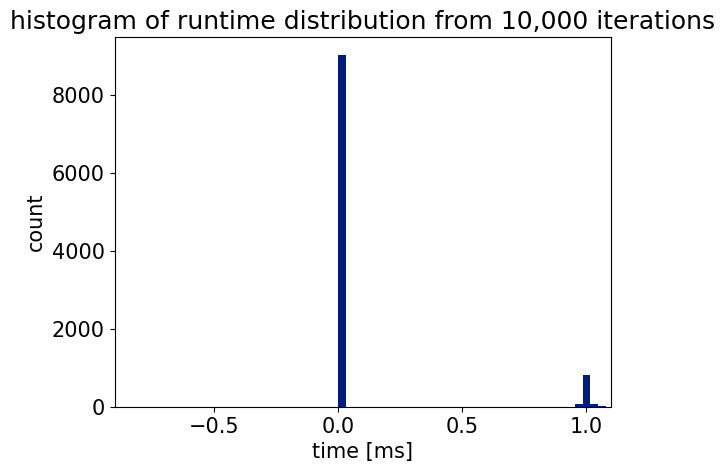

In [12]:
time_ms = 1000 * np.array(time_arr)

time_mean, time_sd = np.mean(time_ms), np.std(time_ms)

fig, ax = plt.subplots(1)
ax.hist(time_ms,bins = 100)
ax.set_title("histogram of runtime distribution from 10,000 iterations")
ax.set_xlim(time_mean - 1, time_mean + 1)
ax.set_xlabel("time [ms]")
ax.set_ylabel("count")

print(f"mean_time = {time_mean} ms, time_sd = {time_sd} ms")

# Peak plasma current for each shot

In [2]:
Ip_path = r"resources\magneticSignal\Plasma current for plasma position.xlsx"
Ip_df = pd.read_excel(Ip_path,sheet_name = "Sheet1")

Text(0, 0.5, 'Ip [A]')

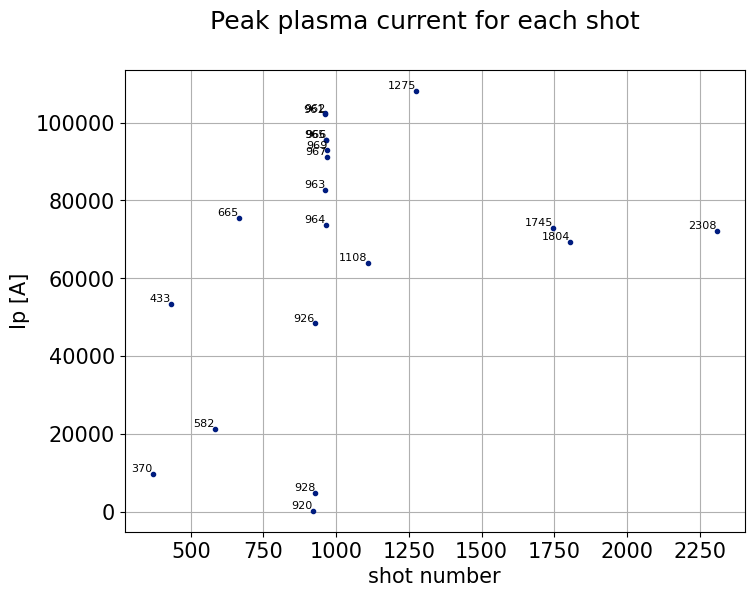

In [30]:
all_shots = [column for column in Ip_df.columns if column != "Time [ms]"]
peak_Ip = Ip_df.max().iloc[1:]

fig, ax = plt.subplots(1,1,figsize = (8,6))
ax.plot(peak_Ip, ".")

for x, y in zip(peak_Ip.index,peak_Ip.values):
    ax.text(x,y,str(x),fontsize = 8,ha = "right",va = "bottom")
ax.grid()
fig.suptitle("Peak plasma current for each shot")
ax.set_xlabel("shot number")
ax.set_ylabel("Ip [A]")



# Error on simulated toroidal filament

In [55]:
def simulate_signal(num_iteration = 1_000,p_down = 0.5,mean_displacement = 0.10):
    R_sim, Z_sim = [0], [0]
    all_probe_signal = [[] for _ in range(13)]

    for _ in range(num_iteration):
        R_est = R_sim[-1] if len(R_sim) > 0 else 0
        Z_est = Z_sim[-1] if len(Z_sim) > 0 else 0
        if abs(R_est) <= mean_displacement:
            R_shift = R_est + np.random.choice([-0.001, 0.001], p = [p_down,1-p_down])
            Z_shift = Z_est + np.random.choice([-0.001, 0.001], p = [0.5,0.5])

        else:
            R_shift = R_est + np.random.choice([-0.001, 0.001], p = [0.5,0.5])
            Z_shift = Z_est + np.random.choice([-0.001, 0.001], p = [0.5,0.5])
        
        #append shift value
        R_sim.append(R_shift)
        Z_sim.append(Z_shift)

        all_probe_signal[0].append(0)

        for probe_num, probe_signal in enumerate(all_probe_signal[1:], start = 1):
            phi = coil_angle_dict[probe_num]
            r_probe = R0 + R * np.cos(phi)
            z_probe = R * np.sin(phi) - Z_shift
            a_f = R0 + R_shift
            signal_i = coil_signal(phi,r_probe,z_probe,a_f) #signal of probe at this specific iteration
            probe_signal.append(signal_i)

    return list(range(len(R_sim))),R_sim, Z_sim, all_probe_signal

iteration, R_sim, Z_sim, all_probe_signal = simulate_signal(5000,p_down=0.5)

In [56]:
from methods_toroidal_filament.plasma_shift import toroidal_filament_shift_progression
from methods_toroidal_filament.parameters import all_arrays
import pandas as pd

signal_df = pd.DataFrame(np.array(all_probe_signal).T)
iteration_df = pd.Series(np.array(iteration).T)

use_probes = all_arrays

iteration_arr, R_arr, R_err, Z_arr, Z_err = toroidal_filament_shift_progression(iteration_df, signal_df,probe_number=use_probes)

toroidal filament model: 100%|█████████▉| 5000/5001 [00:05<00:00, 897.22it/s] 


In [57]:
R_err = []
Z_err = []

for i in range(len(R_arr)):

    R_err.append(np.abs(np.array(R_sim) - np.array(R_arr[i])))
    Z_err.append(np.abs(np.array(Z_sim) - np.array(Z_arr[i])))

print(np.mean(R_err))
print(np.mean(Z_err))

0.00208943673167645
0.0024026695926539464


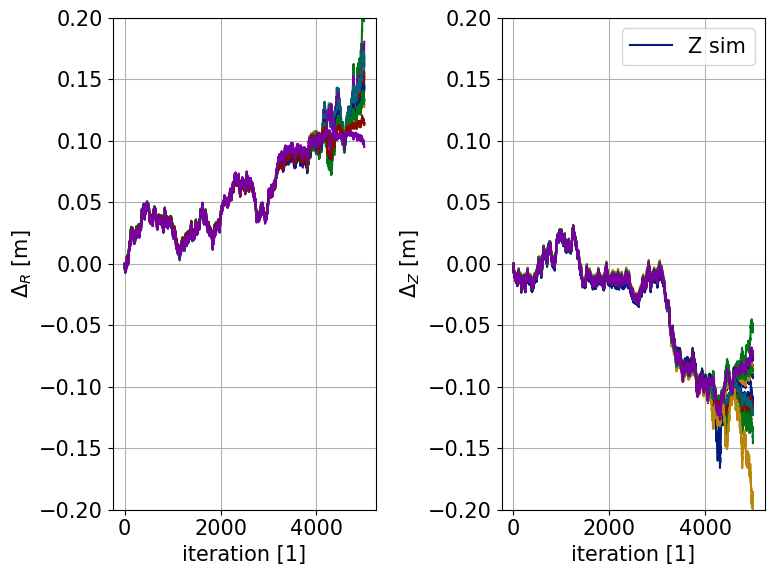

In [58]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1,2,figsize = (8,6))

ax[0].plot(iteration, R_sim,label = "R sim")
ax[0].set_xlabel("iteration [1]")
ax[0].set_ylabel(r"$\Delta_R$ [m]")
ax[0].grid()

ax[1].plot(iteration, Z_sim, label = "Z sim")
ax[1].set_xlabel("iteration [1]")
ax[1].set_ylabel(r"$\Delta_Z$ [m]")
ax[1].grid()
for i, probe_set in enumerate(use_probes):
    ax[0].plot(iteration_arr[i], R_arr[i])
    ax[1].plot(iteration_arr[i],Z_arr[i])
ax[1].legend()
for a in ax:
    a.set_ylim(-0.2,0.2)
plt.tight_layout()

# Torus plot

c:\Users\pitit\Anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:36: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


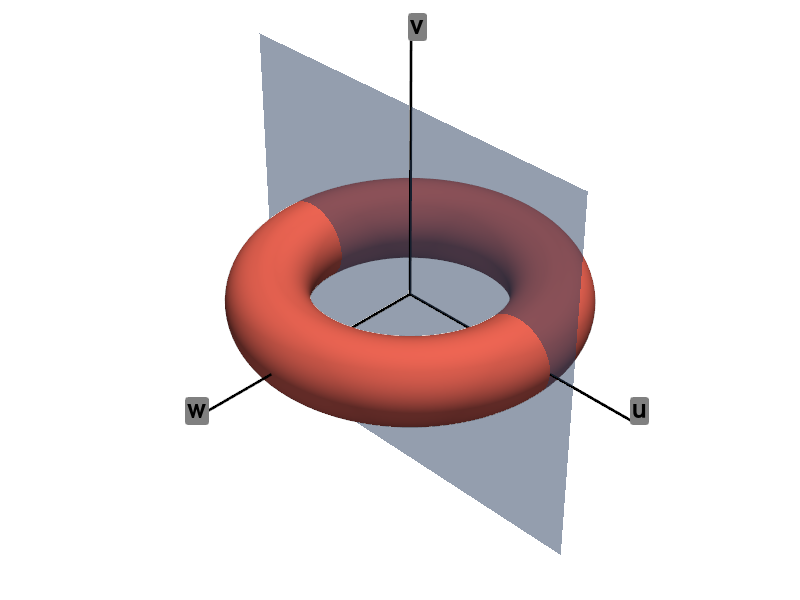

In [42]:
import pyvista as pv

dpi = 100
plotter = pv.Plotter(window_size=[8*dpi, 6*dpi])

torus = pv.ParametricTorus(1.0, 0.3)
plane = pv.Plane(center=(0,0,0), direction=(1,0,0), i_size=3, j_size=3)

plotter.add_mesh(torus, color='#FF6F61', smooth_shading=True)
plotter.add_mesh(plane, color='#6FA3EF', opacity=0.5)

plotter.set_background('white')

length = 2.0

# Create axis lines
w_axis = pv.Line([0, 0, 0], [length, 0, 0])  # along x-axis, label 'w'
u_axis = pv.Line([0, 0, 0], [0, length, 0])  # along y-axis, label 'u'
v_axis = pv.Line([0, 0, 0], [0, 0, length])  # along z-axis, label 'v'

plotter.add_mesh(w_axis, color='black', line_width=3)
plotter.add_mesh(u_axis, color='black', line_width=3)
plotter.add_mesh(v_axis, color='black', line_width=3)

# Add text labels at the ends
plotter.add_point_labels([[length, 0, 0]], ['w'], font_size=24, text_color='black')
plotter.add_point_labels([[0, length, 0]], ['u'], font_size=24, text_color='black')
plotter.add_point_labels([[0, 0, length]], ['v'], font_size=24, text_color='black')

# Example mesh (torus or plane) can be added here

plotter.camera.zoom(1.5)  # Zoom in 1.5x (adjust as needed)

plotter.show()

# ROI

Text(0, 0.5, 'row [pixel]')

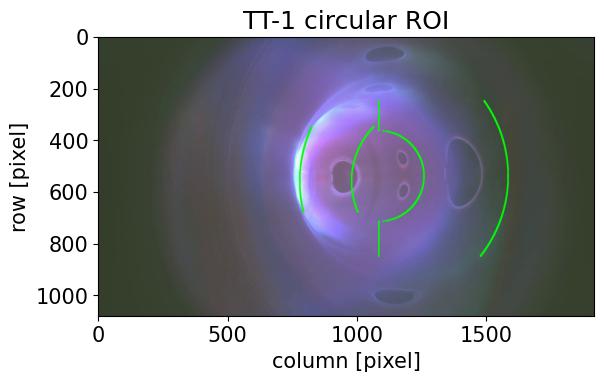

In [3]:
from OFIT_dir.parameters import TT1_circular_ROIs as ROIs
from OFIT_dir.local_image import rev_image
from OFIT_dir.OFIT import process_image, field_edge_detection

def ROI_overlay(image,column,row):
    #function to overlay ROI onto image
    img_height, img_width, _ = image.shape

    for col, ro in zip(column, row):
        if 0 <= ro < img_height and 0 <= col < img_width:
            image[ro-3:ro+3, col-3:col+3] = [0,255,0]  # Green color

img = rev_image(966,190)

img_copy = img.copy()

ROI_overlay(img_copy,ROIs["ROI_high_x0"],ROIs["high_row_range"])
ROI_overlay(img_copy,ROIs["ROI_high_xf"],ROIs["high_row_range"])
ROI_overlay(img_copy,ROIs["ROI_low_x0"],ROIs["low_row_range"])
ROI_overlay(img_copy,ROIs["ROI_low_xf"],ROIs["low_row_range"])

fig, ax = plt.subplots(1)
ax.imshow(img_copy)
ax.set_title("TT-1 circular ROI")
ax.set_xlabel("column [pixel]")
ax.set_ylabel("row [pixel]")

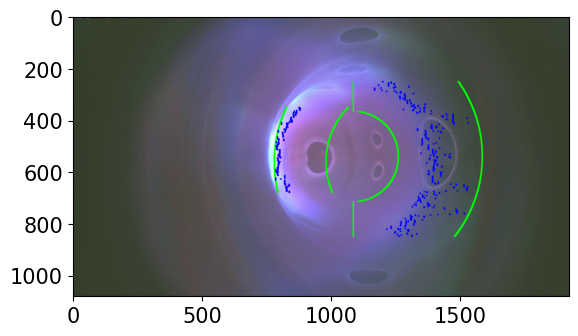

In [4]:
processed_img = process_image(img)
(x_high,y_high), (x_low,y_low) = field_edge_detection(processed_img)

def overlay_detection(img, x_arr, y_arr):
    for x, y in zip(x_arr, y_arr):
        img[y-3:y+3,x-3:x+3] = [0,0,255]
    return

overlay_detection(img_copy,x_high,y_high)
overlay_detection(img_copy,x_low,y_low)

plt.imshow(img_copy)

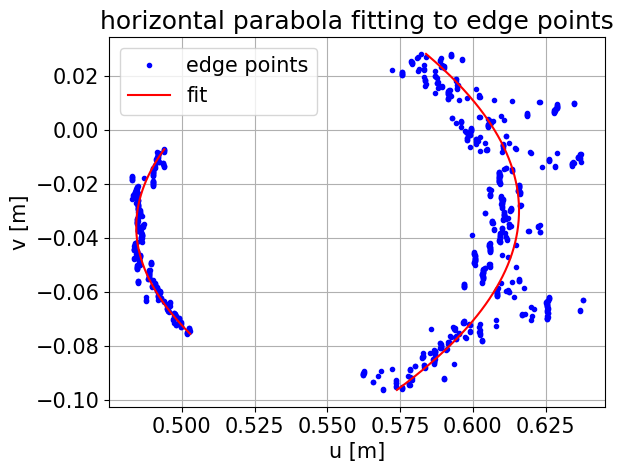

In [5]:
from OFIT_dir.transformation import RANSAC_parabola, RANSAC_circle
from OFIT_dir.detection_projection import pix_to_projection
from OFIT_dir.OFIT import TT1_projection_matrix, TT1_camera_principle_point

u_low, v_low = pix_to_projection(x_low,y_low,TT1_projection_matrix,TT1_camera_principle_point)
u_high,v_high = pix_to_projection(x_high,y_high,TT1_projection_matrix,TT1_camera_principle_point)

low_field_param, *_ = RANSAC_parabola(u_low,v_low)
high_field_param, *_ = RANSAC_parabola(u_high,v_high) 

horizontal_parabola = lambda y,a,b,c: a*y**2 + b*y + c

fig, ax = plt.subplots(1)

ax.plot(u_low,v_low,".", color = "blue",label = "edge points")
ax.plot(u_high,v_high,".", color = "blue")

v_range_low = np.linspace(min(v_low),max(v_low),300)
v_range_high = np.linspace(min(v_high),max(v_high),300)

ax.plot(horizontal_parabola(v_range_low,*low_field_param),v_range_low, color = "red", label = "fit")
ax.plot(horizontal_parabola(v_range_high,*high_field_param),v_range_high, color = "red")

ax.set_title("horizontal parabola fitting to edge points")
ax.set_xlabel("u [m]")
ax.set_ylabel("v [m]")
ax.grid()
ax.legend()

0.3877596855163574


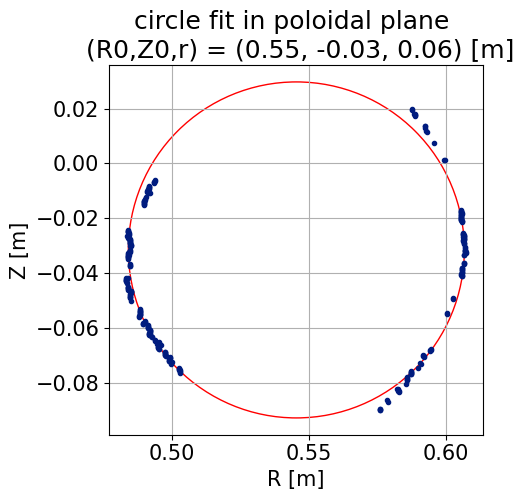

In [22]:
from OFIT_dir.OFIT import poloidal_transformation
from OFIT_dir.parameters import TT1_camera_translation
from matplotlib.patches import Circle

R_low, Z_low, *_ = poloidal_transformation(u_low,v_low,TT1_camera_translation)
R_high,Z_high, *_ = poloidal_transformation(u_high,v_high,TT1_camera_translation)

R_com, Z_com = np.append(R_low, R_high), np.append(Z_low, Z_high)

begin = time.time()
(R0,Z0,radius), *_ = RANSAC_circle(R_com, Z_com)
stop = time.time()
print(stop - begin)
circle_fit = Circle((R0,Z0), radius, fill = False, color = "red")

fig, ax = plt.subplots(1)

ax.plot(R_com,Z_com,".")
ax.add_patch(circle_fit)
ax.set_aspect("equal")
ax.set_title(f"circle fit in poloidal plane \n (R0,Z0,r) = {(round(R0,2),round(Z0,2),round(radius,2))} [m]")
ax.set_xlabel("R [m]")
ax.set_ylabel("Z [m]")
ax.grid()

In [17]:
from OFIT_dir.OFIT import OFIT
from tqdm import tqdm
import time

time_record, R_result, Z_result,r_result = ([] for _ in range(4))

img_directory = r"resources\TTI frame\2308\2308_frames_jpg"

frame_to_time = lambda frame: frame/2 + 260

count = 0
for frame in tqdm(os.listdir(img_directory)):
    if count == 200: break
    frame_no = frame.split(".")[0]
    img = rev_image(2308,frame_no)

    frame_time = frame_to_time(int(frame_no))
    start = time.time()
    (R0,Z0,r), _ = OFIT(img,2308,frame_no,RANSAC_n = 30)
    end = time.time()
    if R0 == None: continue
    time_record.append(end - start)
    R_result.append(R0)
    Z_result.append(Z0)
    r_result.append(r)
    count += 1

  1%|          | 4/400 [00:00<00:23, 17.21it/s]

image shot 2308 frame 1 is too dim or too bright returning None
image shot 2308 frame 10 is too dim or too bright returning None
image shot 2308 frame 100 is too dim or too bright returning None
image shot 2308 frame 101 is too dim or too bright returning None


  2%|▏         | 7/400 [00:00<00:19, 20.40it/s]

image shot 2308 frame 102 is too dim or too bright returning None
image shot 2308 frame 103 is too dim or too bright returning None
image shot 2308 frame 104 is too dim or too bright returning None
image shot 2308 frame 105 is too dim or too bright returning None
image shot 2308 frame 106 is too dim or too bright returning None
image shot 2308 frame 107 is too dim or too bright returning None


  4%|▎         | 14/400 [00:00<00:15, 25.61it/s]

image shot 2308 frame 108 is too dim or too bright returning None
image shot 2308 frame 109 is too dim or too bright returning None
image shot 2308 frame 11 is too dim or too bright returning None
image shot 2308 frame 110 is too dim or too bright returning None
image shot 2308 frame 111 is too dim or too bright returning None
image shot 2308 frame 112 is too dim or too bright returning None


  5%|▌         | 20/400 [00:00<00:14, 26.78it/s]

image shot 2308 frame 113 is too dim or too bright returning None
image shot 2308 frame 114 is too dim or too bright returning None
image shot 2308 frame 115 is too dim or too bright returning None
image shot 2308 frame 116 is too dim or too bright returning None
image shot 2308 frame 117 is too dim or too bright returning None


  6%|▋         | 26/400 [00:01<00:15, 24.76it/s]

image shot 2308 frame 118 is too dim or too bright returning None
image shot 2308 frame 119 is too dim or too bright returning None
image shot 2308 frame 12 is too dim or too bright returning None
image shot 2308 frame 120 is too dim or too bright returning None
image shot 2308 frame 121 is too dim or too bright returning None
image shot 2308 frame 122 is too dim or too bright returning None


  8%|▊         | 32/400 [00:01<00:14, 25.76it/s]

image shot 2308 frame 123 is too dim or too bright returning None
image shot 2308 frame 124 is too dim or too bright returning None
image shot 2308 frame 125 is too dim or too bright returning None
image shot 2308 frame 126 is too dim or too bright returning None
image shot 2308 frame 127 is too dim or too bright returning None
image shot 2308 frame 128 is too dim or too bright returning None


 10%|▉         | 39/400 [00:01<00:13, 26.49it/s]

image shot 2308 frame 129 is too dim or too bright returning None
image shot 2308 frame 13 is too dim or too bright returning None
image shot 2308 frame 130 is too dim or too bright returning None
image shot 2308 frame 131 is too dim or too bright returning None
image shot 2308 frame 132 is too dim or too bright returning None
image shot 2308 frame 133 is too dim or too bright returning None


 10%|█         | 42/400 [00:01<00:15, 22.91it/s]

image shot 2308 frame 134 is too dim or too bright returning None
image shot 2308 frame 135 is too dim or too bright returning None
image shot 2308 frame 136 is too dim or too bright returning None
image shot 2308 frame 137 is too dim or too bright returning None


 12%|█▏        | 48/400 [00:02<00:16, 21.57it/s]

image shot 2308 frame 138 is too dim or too bright returning None
image shot 2308 frame 139 is too dim or too bright returning None
image shot 2308 frame 14 is too dim or too bright returning None
image shot 2308 frame 140 is too dim or too bright returning None
image shot 2308 frame 141 is too dim or too bright returning None
image shot 2308 frame 142 is too dim or too bright returning None
image shot 2308 frame 143 is too dim or too bright returning None


 15%|█▍        | 59/400 [00:03<00:29, 11.50it/s]

image shot 2308 frame 147 is too dim or too bright returning None
image shot 2308 frame 148 is too dim or too bright returning None
image shot 2308 frame 149 is too dim or too bright returning None
image shot 2308 frame 15 is too dim or too bright returning None
image shot 2308 frame 150 is too dim or too bright returning None
image shot 2308 frame 151 is too dim or too bright returning None


 17%|█▋        | 67/400 [00:06<01:34,  3.54it/s]

image shot 2308 frame 16 is too dim or too bright returning None


 20%|█▉        | 78/400 [00:10<01:58,  2.71it/s]

image shot 2308 frame 17 is too dim or too bright returning None


 22%|██▏       | 89/400 [00:14<01:51,  2.78it/s]

image shot 2308 frame 18 is too dim or too bright returning None


 25%|██▌       | 100/400 [00:19<02:54,  1.72it/s]

image shot 2308 frame 19 is too dim or too bright returning None


 28%|██▊       | 111/400 [00:24<02:19,  2.07it/s]

image shot 2308 frame 2 is too dim or too bright returning None
image shot 2308 frame 20 is too dim or too bright returning None


 31%|███       | 123/400 [00:29<02:03,  2.24it/s]

image shot 2308 frame 21 is too dim or too bright returning None


 34%|███▍      | 137/400 [00:32<00:36,  7.12it/s]

image shot 2308 frame 217 is too dim or too bright returning None
image shot 2308 frame 218 is too dim or too bright returning None
image shot 2308 frame 219 is too dim or too bright returning None
image shot 2308 frame 22 is too dim or too bright returning None
image shot 2308 frame 220 is too dim or too bright returning None
image shot 2308 frame 221 is too dim or too bright returning None


 35%|███▌      | 140/400 [00:32<00:26,  9.84it/s]

image shot 2308 frame 222 is too dim or too bright returning None
image shot 2308 frame 223 is too dim or too bright returning None
image shot 2308 frame 224 is too dim or too bright returning None


 36%|███▌      | 142/400 [00:33<00:49,  5.20it/s]

image shot 2308 frame 227 is too dim or too bright returning None
image shot 2308 frame 228 is too dim or too bright returning None


 36%|███▋      | 145/400 [00:34<00:47,  5.33it/s]

image shot 2308 frame 23 is too dim or too bright returning None


 39%|███▉      | 156/400 [00:38<01:29,  2.72it/s]

image shot 2308 frame 24 is too dim or too bright returning None


 42%|████▏     | 167/400 [00:42<01:38,  2.36it/s]

image shot 2308 frame 25 is too dim or too bright returning None


 44%|████▍     | 178/400 [00:46<01:27,  2.54it/s]

image shot 2308 frame 26 is too dim or too bright returning None


 47%|████▋     | 189/400 [00:50<01:20,  2.62it/s]

image shot 2308 frame 27 is too dim or too bright returning None


 50%|█████     | 200/400 [00:54<01:15,  2.64it/s]

image shot 2308 frame 28 is too dim or too bright returning None


 53%|█████▎    | 211/400 [00:58<01:12,  2.60it/s]

image shot 2308 frame 29 is too dim or too bright returning None


 54%|█████▍    | 216/400 [00:59<01:03,  2.88it/s]

image shot 2308 frame 294 is too dim or too bright returning None
image shot 2308 frame 295 is too dim or too bright returning None


 56%|█████▋    | 225/400 [01:00<00:19,  9.14it/s]

image shot 2308 frame 297 is too dim or too bright returning None
image shot 2308 frame 298 is too dim or too bright returning None
image shot 2308 frame 299 is too dim or too bright returning None
image shot 2308 frame 3 is too dim or too bright returning None
image shot 2308 frame 30 is too dim or too bright returning None
image shot 2308 frame 300 is too dim or too bright returning None


 57%|█████▋    | 228/400 [01:00<00:14, 11.87it/s]

image shot 2308 frame 301 is too dim or too bright returning None
image shot 2308 frame 302 is too dim or too bright returning None
image shot 2308 frame 303 is too dim or too bright returning None
image shot 2308 frame 304 is too dim or too bright returning None
image shot 2308 frame 305 is too dim or too bright returning None


 58%|█████▊    | 233/400 [01:00<00:11, 14.70it/s]

image shot 2308 frame 306 is too dim or too bright returning None
image shot 2308 frame 307 is too dim or too bright returning None
image shot 2308 frame 308 is too dim or too bright returning None
image shot 2308 frame 309 is too dim or too bright returning None
image shot 2308 frame 31 is too dim or too bright returning None


 60%|█████▉    | 239/400 [01:00<00:08, 19.63it/s]

image shot 2308 frame 310 is too dim or too bright returning None
image shot 2308 frame 311 is too dim or too bright returning None
image shot 2308 frame 312 is too dim or too bright returning None
image shot 2308 frame 313 is too dim or too bright returning None
image shot 2308 frame 314 is too dim or too bright returning None
image shot 2308 frame 315 is too dim or too bright returning None


 61%|██████▏   | 245/400 [01:01<00:06, 22.56it/s]

image shot 2308 frame 316 is too dim or too bright returning None
image shot 2308 frame 317 is too dim or too bright returning None
image shot 2308 frame 318 is too dim or too bright returning None
image shot 2308 frame 319 is too dim or too bright returning None
image shot 2308 frame 32 is too dim or too bright returning None
image shot 2308 frame 320 is too dim or too bright returning None


 63%|██████▎   | 251/400 [01:01<00:06, 24.15it/s]

image shot 2308 frame 321 is too dim or too bright returning None
image shot 2308 frame 322 is too dim or too bright returning None
image shot 2308 frame 323 is too dim or too bright returning None
image shot 2308 frame 324 is too dim or too bright returning None
image shot 2308 frame 325 is too dim or too bright returning None
image shot 2308 frame 326 is too dim or too bright returning None


 64%|██████▍   | 257/400 [01:01<00:05, 24.20it/s]

image shot 2308 frame 327 is too dim or too bright returning None
image shot 2308 frame 328 is too dim or too bright returning None
image shot 2308 frame 329 is too dim or too bright returning None
image shot 2308 frame 33 is too dim or too bright returning None
image shot 2308 frame 330 is too dim or too bright returning None
image shot 2308 frame 331 is too dim or too bright returning None


 66%|██████▌   | 263/400 [01:01<00:05, 25.82it/s]

image shot 2308 frame 332 is too dim or too bright returning None
image shot 2308 frame 333 is too dim or too bright returning None
image shot 2308 frame 334 is too dim or too bright returning None
image shot 2308 frame 335 is too dim or too bright returning None
image shot 2308 frame 336 is too dim or too bright returning None
image shot 2308 frame 337 is too dim or too bright returning None


 67%|██████▋   | 269/400 [01:02<00:05, 24.85it/s]

image shot 2308 frame 338 is too dim or too bright returning None
image shot 2308 frame 339 is too dim or too bright returning None
image shot 2308 frame 34 is too dim or too bright returning None
image shot 2308 frame 340 is too dim or too bright returning None
image shot 2308 frame 341 is too dim or too bright returning None
image shot 2308 frame 342 is too dim or too bright returning None


 69%|██████▉   | 275/400 [01:02<00:04, 25.29it/s]

image shot 2308 frame 343 is too dim or too bright returning None
image shot 2308 frame 344 is too dim or too bright returning None
image shot 2308 frame 345 is too dim or too bright returning None
image shot 2308 frame 346 is too dim or too bright returning None
image shot 2308 frame 347 is too dim or too bright returning None
image shot 2308 frame 348 is too dim or too bright returning None


 70%|██████▉   | 278/400 [01:02<00:04, 26.03it/s]

image shot 2308 frame 349 is too dim or too bright returning None
image shot 2308 frame 35 is too dim or too bright returning None
image shot 2308 frame 350 is too dim or too bright returning None


 71%|███████   | 284/400 [01:02<00:05, 19.37it/s]

image shot 2308 frame 351 is too dim or too bright returning None
image shot 2308 frame 352 is too dim or too bright returning None
image shot 2308 frame 353 is too dim or too bright returning None
image shot 2308 frame 354 is too dim or too bright returning None
image shot 2308 frame 355 is too dim or too bright returning None


 72%|███████▎  | 290/400 [01:03<00:05, 20.87it/s]

image shot 2308 frame 356 is too dim or too bright returning None
image shot 2308 frame 357 is too dim or too bright returning None
image shot 2308 frame 358 is too dim or too bright returning None
image shot 2308 frame 359 is too dim or too bright returning None
image shot 2308 frame 36 is too dim or too bright returning None


 73%|███████▎  | 293/400 [01:03<00:05, 20.97it/s]

image shot 2308 frame 360 is too dim or too bright returning None
image shot 2308 frame 361 is too dim or too bright returning None
image shot 2308 frame 362 is too dim or too bright returning None
image shot 2308 frame 363 is too dim or too bright returning None
image shot 2308 frame 364 is too dim or too bright returning None


 75%|███████▍  | 299/400 [01:03<00:04, 22.63it/s]

image shot 2308 frame 365 is too dim or too bright returning None
image shot 2308 frame 366 is too dim or too bright returning None
image shot 2308 frame 367 is too dim or too bright returning None
image shot 2308 frame 368 is too dim or too bright returning None
image shot 2308 frame 369 is too dim or too bright returning None


 76%|███████▋  | 305/400 [01:03<00:04, 22.71it/s]

image shot 2308 frame 37 is too dim or too bright returning None
image shot 2308 frame 370 is too dim or too bright returning None
image shot 2308 frame 371 is too dim or too bright returning None
image shot 2308 frame 372 is too dim or too bright returning None
image shot 2308 frame 373 is too dim or too bright returning None


 77%|███████▋  | 308/400 [01:03<00:03, 23.46it/s]

image shot 2308 frame 374 is too dim or too bright returning None
image shot 2308 frame 375 is too dim or too bright returning None
image shot 2308 frame 376 is too dim or too bright returning None
image shot 2308 frame 377 is too dim or too bright returning None
image shot 2308 frame 378 is too dim or too bright returning None


 78%|███████▊  | 314/400 [01:04<00:03, 23.25it/s]

image shot 2308 frame 379 is too dim or too bright returning None
image shot 2308 frame 38 is too dim or too bright returning None
image shot 2308 frame 380 is too dim or too bright returning None
image shot 2308 frame 381 is too dim or too bright returning None
image shot 2308 frame 382 is too dim or too bright returning None
image shot 2308 frame 383 is too dim or too bright returning None


 80%|████████  | 320/400 [01:04<00:03, 20.87it/s]

image shot 2308 frame 384 is too dim or too bright returning None
image shot 2308 frame 385 is too dim or too bright returning None
image shot 2308 frame 386 is too dim or too bright returning None
image shot 2308 frame 387 is too dim or too bright returning None


 81%|████████  | 323/400 [01:04<00:03, 20.98it/s]

image shot 2308 frame 388 is too dim or too bright returning None
image shot 2308 frame 389 is too dim or too bright returning None
image shot 2308 frame 39 is too dim or too bright returning None
image shot 2308 frame 390 is too dim or too bright returning None
image shot 2308 frame 391 is too dim or too bright returning None


 82%|████████▏ | 329/400 [01:04<00:03, 20.22it/s]

image shot 2308 frame 392 is too dim or too bright returning None
image shot 2308 frame 393 is too dim or too bright returning None
image shot 2308 frame 394 is too dim or too bright returning None
image shot 2308 frame 395 is too dim or too bright returning None
image shot 2308 frame 396 is too dim or too bright returning None


 84%|████████▍ | 335/400 [01:05<00:02, 21.76it/s]

image shot 2308 frame 397 is too dim or too bright returning None
image shot 2308 frame 398 is too dim or too bright returning None
image shot 2308 frame 399 is too dim or too bright returning None
image shot 2308 frame 4 is too dim or too bright returning None
image shot 2308 frame 40 is too dim or too bright returning None
image shot 2308 frame 400 is too dim or too bright returning None


 84%|████████▍ | 338/400 [01:05<00:02, 21.65it/s]

image shot 2308 frame 41 is too dim or too bright returning None
image shot 2308 frame 42 is too dim or too bright returning None
image shot 2308 frame 43 is too dim or too bright returning None
image shot 2308 frame 44 is too dim or too bright returning None


 86%|████████▌ | 344/400 [01:05<00:02, 19.29it/s]

image shot 2308 frame 45 is too dim or too bright returning None
image shot 2308 frame 46 is too dim or too bright returning None
image shot 2308 frame 47 is too dim or too bright returning None
image shot 2308 frame 48 is too dim or too bright returning None


 87%|████████▋ | 347/400 [01:05<00:02, 20.35it/s]

image shot 2308 frame 49 is too dim or too bright returning None
image shot 2308 frame 5 is too dim or too bright returning None
image shot 2308 frame 50 is too dim or too bright returning None


 89%|████████▉ | 356/400 [01:09<00:12,  3.40it/s]

image shot 2308 frame 6 is too dim or too bright returning None


 93%|█████████▎| 372/400 [01:13<00:03,  8.44it/s]

image shot 2308 frame 69 is too dim or too bright returning None
image shot 2308 frame 7 is too dim or too bright returning None
image shot 2308 frame 70 is too dim or too bright returning None
image shot 2308 frame 71 is too dim or too bright returning None
image shot 2308 frame 72 is too dim or too bright returning None
image shot 2308 frame 73 is too dim or too bright returning None


 94%|█████████▍| 378/400 [01:13<00:01, 14.34it/s]

image shot 2308 frame 74 is too dim or too bright returning None
image shot 2308 frame 75 is too dim or too bright returning None
image shot 2308 frame 76 is too dim or too bright returning None
image shot 2308 frame 77 is too dim or too bright returning None
image shot 2308 frame 78 is too dim or too bright returning None
image shot 2308 frame 79 is too dim or too bright returning None


 96%|█████████▌| 384/400 [01:13<00:00, 19.11it/s]

image shot 2308 frame 8 is too dim or too bright returning None
image shot 2308 frame 80 is too dim or too bright returning None
image shot 2308 frame 81 is too dim or too bright returning None
image shot 2308 frame 82 is too dim or too bright returning None
image shot 2308 frame 83 is too dim or too bright returning None
image shot 2308 frame 84 is too dim or too bright returning None


 97%|█████████▋| 387/400 [01:13<00:00, 20.06it/s]

image shot 2308 frame 85 is too dim or too bright returning None
image shot 2308 frame 86 is too dim or too bright returning None
image shot 2308 frame 87 is too dim or too bright returning None
image shot 2308 frame 88 is too dim or too bright returning None


 98%|█████████▊| 390/400 [01:13<00:00, 17.77it/s]

image shot 2308 frame 89 is too dim or too bright returning None
image shot 2308 frame 9 is too dim or too bright returning None
image shot 2308 frame 90 is too dim or too bright returning None
image shot 2308 frame 91 is too dim or too bright returning None


 99%|█████████▉| 396/400 [01:14<00:00, 18.73it/s]

image shot 2308 frame 92 is too dim or too bright returning None
image shot 2308 frame 93 is too dim or too bright returning None
image shot 2308 frame 94 is too dim or too bright returning None
image shot 2308 frame 95 is too dim or too bright returning None
image shot 2308 frame 96 is too dim or too bright returning None


100%|██████████| 400/400 [01:14<00:00,  5.38it/s]

image shot 2308 frame 97 is too dim or too bright returning None
image shot 2308 frame 98 is too dim or too bright returning None
image shot 2308 frame 99 is too dim or too bright returning None


0.3740439105343509
0.07273440356335664


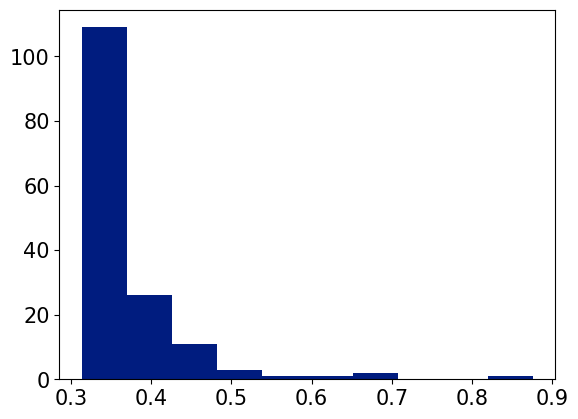

In [21]:
plt.hist(time_record)
print(np.mean(time_record))
print(np.std(time_record))

# Determine Offset values

Using the frames where the plasma is expected to be at the centroid, the relationship between the offset value in each probe array and plasma current is determined

In [1]:
import cv2
import shutil
from matplotlib import pyplot as plt
from skimage.metrics import structural_similarity
from tqdm import tqdm

retreive_img_directory = lambda shot_no: f"resources\\TTI frame\\{shot_no}\\{shot_no}_frames_jpg\\"
centroid_directory = r"resources\\centroidFrames"

img_directory =  retreive_img_directory(966)

all_shot_no = [370,433,582,665,920,926,928] + list(range(960,971)) + [1108,1275,1745,1804,2308]
base_frame_dict = {
    433:187, 582:160, 665:189, 926:160, 960:155, 961:192, 962:199, 963:155, 964: 154, 965: 200, 966:200, 967:208, 968:154,969:205,
    970:209,1108:184,1275:184,1745:181,1804:189,2308:198
}

similarity = []
for shot_no in all_shot_no:
    if shot_no in [370,920,928]:continue

    img_directory = retreive_img_directory(shot_no)
    for i in [-1,0,1]:
        frame = base_frame_dict[shot_no] + i
        img_path = img_directory + f"{frame}.jpg"
        shutil.copy(img_path,centroid_directory + f"\\{shot_no}_{frame}.jpg")

c:\Users\pitit\Anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
c:\Users\pitit\Anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
c:\Users\pitit\Anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


In [63]:
from methods_toroidal_filament.parameters import all_arrays, coil_angle_dict, probe_lst_to_str
from methods_toroidal_filament.DxDz import cal_newton_DxDz as cal_DxDz
from methods_toroidal_filament.signal_strength import cal_signal
from methods_toroidal_filament.process_probe_data import retreive_plasma_current,retreive_magnetic_signal, trim_quantities, discharge_duration

import numpy as np
import os
from tqdm import tqdm
import pandas as pd

Ip_df = pd.read_excel(os.getcwd() + r"\resources\magneticSignal\Plasma current for plasma position.xlsx",sheet_name="Sheet1")
probe_signal_path = os.getcwd() + r"\resources\magneticSignal\Magnetic probe GBP_T for plasma position.xlsx"

In [64]:
x_shift, z_shift = 0,0

center_Dx = []
for probe_arr in all_arrays:
    probe_angles = [coil_angle_dict[probe] for probe in probe_arr]
    signal = cal_signal(x_shift,z_shift,probe_angles)
    Dx, Dz = cal_DxDz(signal,probe_angles)
    center_Dx.append(Dx)

mean_Dx_offset = np.mean(center_Dx)

print("mean value of Dx at centroid is" + f" {mean_Dx_offset} m")

def find_closest(arr, target): #use binary search to find element with closest value to the target
    res = arr[0]
    lo = 0
    hi = len(arr) - 1

    while lo <= hi:
        mid = lo + (hi - lo) // 2

        # Update res if mid is closer to target
        if abs(arr[mid] - target) < abs(res - target):
            res = arr[mid]

        # In case of a tie, prefer larger value
        elif abs(arr[mid] - target) == abs(res - target):
            res = max(res, arr[mid])

        if arr[mid] == target:
            return arr[mid]
        elif arr[mid] < target:
            lo = mid + 1
        else:
            hi = mid - 1

    return res

mean value of Dx at centroid is -0.204920003280666 m


In [65]:
# Precompute keys and angles
probe_keys = [probe_lst_to_str(arr) for arr in all_arrays]
probe_angles = {
    probe_lst_to_str(arr): [coil_angle_dict[p] for p in arr]
    for arr in all_arrays
}

offset_dict = {
    key: [[], []] for key in probe_keys
}

# Cache for Excel files and column indices
excel_cache = {}  # shot_no -> DataFrame
column_index_cache = {}  # (shot_no, probe_key) -> list of indices

def time_from_frame(frame):
    time = frame / 2 + 260 
    return find_closest(Ip_df["Time [ms]"], time)

def find_Ip(shot_no, time):
    row = Ip_df.loc[Ip_df["Time [ms]"] == time].index[0]
    col = Ip_df.columns.get_loc(shot_no)
    return Ip_df.iloc[row, col]

def get_signal_df(shot_no):
    if shot_no not in excel_cache:
        #retrieve signal and plasma current to remove noise
        signal_df = pd.read_excel(probe_signal_path, sheet_name=f"shot_{shot_no}")
        Ip_df,time_df,t1, t2 = retreive_plasma_current(shot_no)
        time_df,_, trimmed_signal_df = trim_quantities(time_df,signal_df,Ip_df,t1,t2)
        excel_cache[shot_no] = [time_df,trimmed_signal_df]

    return excel_cache[shot_no]

def find_signal(shot_no, time, probe_arr, probe_key):
    time_df, signal_df = get_signal_df(shot_no)

    if (shot_no, probe_key) not in column_index_cache:
        use_columns = [f"GBP{i}T" for i in probe_arr]
        column_index_cache[(shot_no, probe_key)] = [
            signal_df.columns.get_loc(col) for col in use_columns
        ]


    col_indices = column_index_cache[(shot_no, probe_key)]
    row = time_df[time_df == time].index[0]
    row = time_df.index.get_loc(row)

    return [signal_df.iloc[row, col] for col in col_indices]

def cal_offset(Dx, Dx0=mean_Dx_offset):
    return Dx0 - Dx

shot_no_from_path = lambda path: int(''.join(filter(str.isdigit, path[0:4])))
frame_from_path = lambda path: int(path[-7:-4])

for img_path in tqdm(os.listdir(r"resources\centroidFrames")):
    try:
        shot_no = shot_no_from_path(img_path)

        #retrieve frame number from the file name
        frame = frame_from_path(img_path)

        #find plasma current at time of frame
        time = time_from_frame(frame)
        Ip = find_Ip(shot_no, time)

        for probe_arr in all_arrays:
            probe_key = probe_lst_to_str(probe_arr)
            signal = find_signal(shot_no, time, probe_arr, probe_key)

            angles = probe_angles[probe_key]
            Dx, Dz = cal_DxDz(signal, c_angle=angles)
            offset_Dx = cal_offset(Dx)

            offset_dict[probe_key][0].append(Ip)
            offset_dict[probe_key][1].append(offset_Dx)
    except KeyError:
        continue

  0%|          | 0/60 [00:00<?, ?it/s]

100%|██████████| 60/60 [03:32<00:00,  3.54s/it]


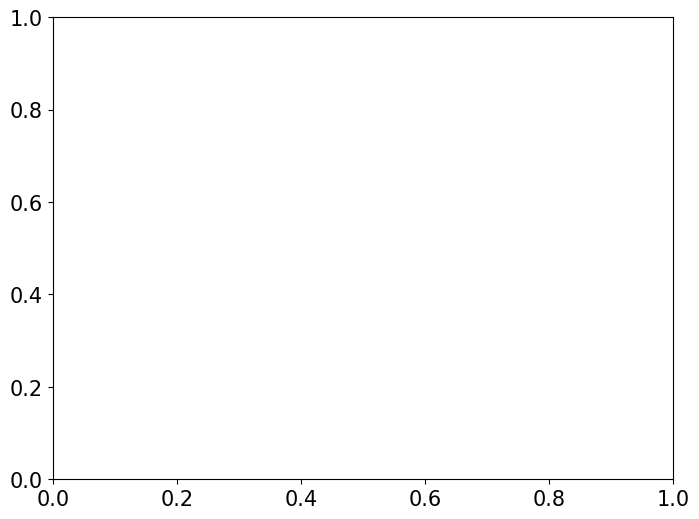

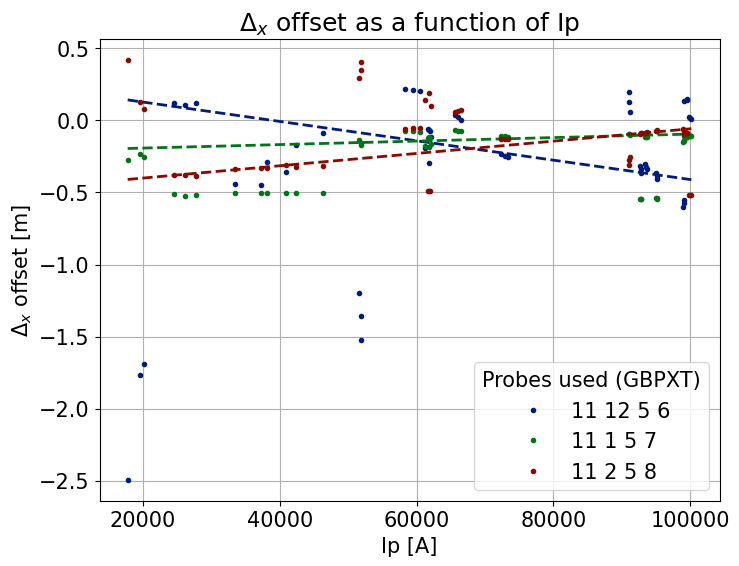

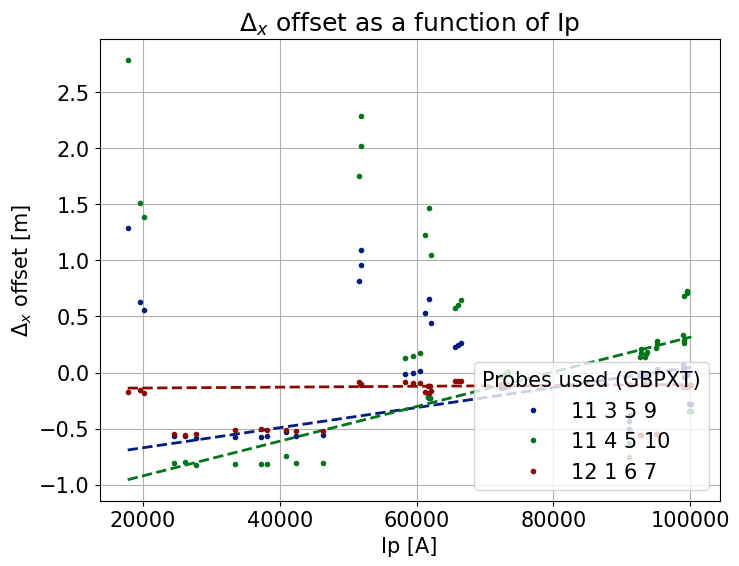

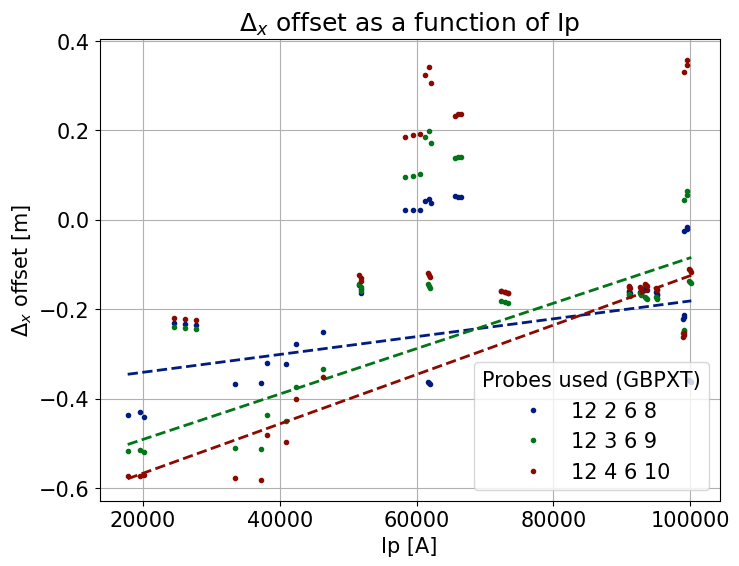

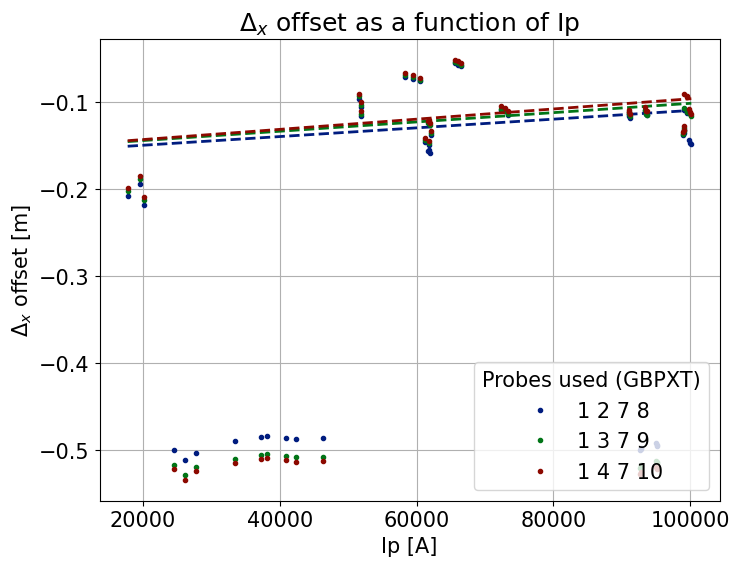

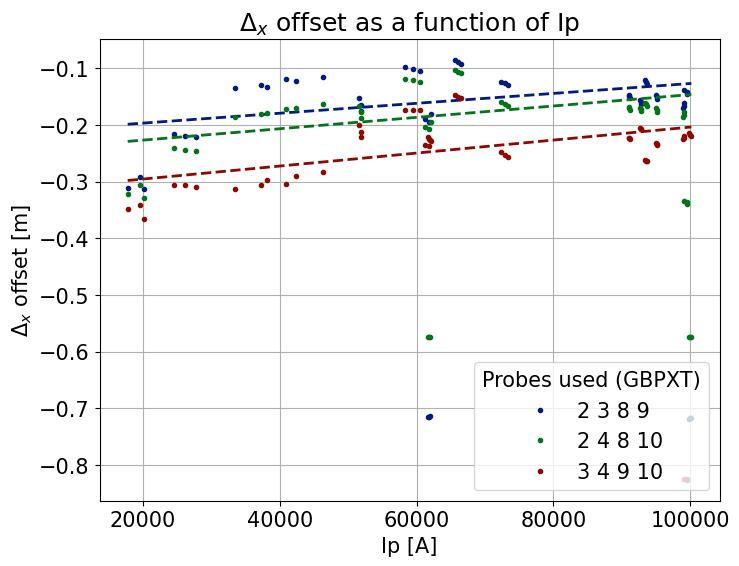

,magnetic probes,R2,SD
0,11 12 5 6,0.852730,0.066099
1,11 1 5 7,0.350293,0.039037
2,11 2 5 8,0.972513,0.020189
3,11 3 5 9,0.950849,0.054714
4,11 4 5 10,0.977106,0.061361
5,12 1 6 7,0.104951,0.027053
6,12 2 6 8,0.352733,0.077594
7,12 3 6 9,0.753014,0.079504
8,12 4 6 10,0.861602,0.063257
9,1 2 7 8,0.098094,0.035775


In [67]:
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

regression_df = pd.DataFrame(columns = ["magnetic probes", "R2","SD"])

for key in offset_dict:
    Ip_list, offset_list = offset_dict[key]
    if Ip_list:  # only sort if not empty
        sorted_pairs = sorted(zip(Ip_list, offset_list))
        offset_dict[key][0], offset_dict[key][1] = map(list, zip(*sorted_pairs))


fig,ax = plt.subplots(1,1,figsize = (8,6))
plt.rcParams.update({
    "font.size":15
})
plt.style.use("seaborn-v0_8-dark-palette")

# Your list of probe combinations
probe_combinations = all_arrays  # Example longer list

# Start counter
group_count = 0

for i, probe_arr in enumerate(probe_combinations):
    if group_count == 0:
        fig, ax = plt.subplots(figsize=(8, 6))  # Create new figure and axis
        color_index = 0

    key = probe_lst_to_str(probe_arr)
    Ip_list = offset_dict[key][0]
    offset_list = offset_dict[key][1]

    if len(Ip_list) >= 2:
        X = np.array(Ip_list).reshape(-1, 1)
        y = np.array(offset_list)

        ransac = RANSACRegressor(LinearRegression(), residual_threshold=0.15, random_state=0)
        ransac.fit(X, y)

        x_vals = np.linspace(min(Ip_list), max(Ip_list), 100).reshape(-1, 1)
        y_fit = ransac.predict(x_vals)

        data_line, = ax.plot(Ip_list, offset_list, ".", label=f"{key}")
        color = data_line.get_color()
        ax.plot(x_vals, y_fit, "--", color=color, lw=2)

        ax.set_xlabel("Ip [A]")
        ax.set_ylabel(r"$\Delta_x$ offset [m]")
        ax.grid(True)

        #calculate R^2
        inlier_mask = ransac.inlier_mask_
        y_pred = ransac.predict(X)

        r2 = r2_score(y[inlier_mask],y_pred[inlier_mask])

        #calculate SD

        residuals = y[inlier_mask] - y_pred[inlier_mask]
        std_dev = np.std(residuals)
        new_row = {"magnetic probes": key, "R2":r2, "SD":std_dev}
        regression_df.loc[len(regression_df)] = new_row

    group_count += 1
    color_index += 1

    # Show plot after every 3 probe combinations
    if group_count == 3 or i == len(probe_combinations) - 1:
        ax.legend(title="Probes used (GBPXT)", loc="lower right", ncols=1)
        ax.set_title(r"$\Delta_x$ offset as a function of Ip")
        plt.show()
        group_count = 0  # Reset counter

regression_df